# Prepare Plots For the Paper

In [115]:
from Planetary_fits import *

In [116]:
from Common_functions import *

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import pandas as pd
import random
import scipy.optimize as opt
import gzip
from scipy.interpolate import interp1d

%matplotlib inline

In [2]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [96]:
def bell_curve(x,c,a,b,d):
    """Function describing a bell curve of the form:
    f(x; a,b,c,d) = d / [1 + |(x-c)/a|^(2b)]
    
    Inputs:
    :param  np.array x: Series of intervals at which the function should
                        be evaluated
    :param float a,b,c: Coefficients of the bell curve function
    
    Returns:
    :param np.array f(x): Series of function values at the intervals in x
    """
    
    fx = d / ( 1.0 + (abs( (x-c)/a ))**(2.0*b) )
    
    return fx

In [3]:
home = os.path.expanduser("~")

# Set up te directory where all microlensing data challenge lightcurves are

temp = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/lc/'
direc = os.listdir(temp)


# Reading in the answer key file for data challenge

answers_direc= home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/Answers'

In [268]:
# Reading in examples of the four classes of lightcurve

# CV
f1 = '/ulwdc1_003_W149.txt'
t1,m1,e1 = np.loadtxt(temp+f1,unpack=True)

df1 = pd.DataFrame({'t': t1, 'magnitude': m1, 'm_err': e1})
peaks1 = np.array([t1[np.argmin(m1)]])-2458000

# PSPL/FFP

f2 = '/ulwdc1_005_W149.txt'
t2,m2,e2 = np.loadtxt(temp+f2,unpack=True)

df2 = pd.DataFrame({'t': t2, 'magnitude': m2, 'm_err': e2})
peaks2 = np.array([t2[np.argmin(m2)]])-2458000

# Binary

f3 = '/ulwdc1_018_W149.txt'
t3,m3,e3 = np.loadtxt(temp+f3,unpack=True)

df3 = pd.DataFrame({'t': t3, 'magnitude': m3, 'm_err': e3})
peaks3 = np.array([t3[np.argmin(m3)]])-2458000

# Planetary 

f4 = '/ulwdc1_004_W149.txt'
t4,m4,e4 = np.loadtxt(temp+f4,unpack=True)

df4 = pd.DataFrame({'t': t4, 'magnitude': m4, 'm_err': e4})
peaks4 = np.array([t4[np.argmin(m4)]])-2458000

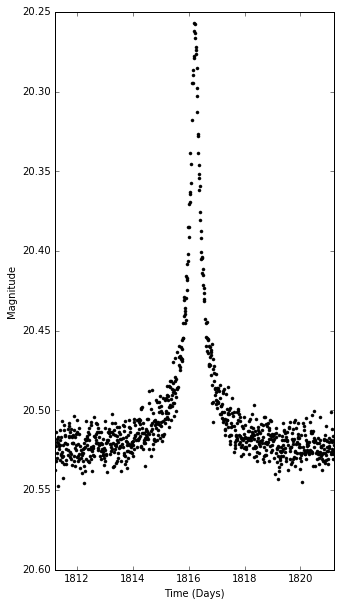

In [276]:
plt.plot(df2['t']-2458000, df2['magnitude'],'k.')
plt.gca().invert_yaxis()
plt.xlim(peaks2[0]-0.5*dt, peaks2[0]+0.5*dt)
plt.ylabel('Magnitude')
plt.xlabel('Time (Days)')
fig = plt.gcf()
fig.set_size_inches(5.0,10,0)
fig.savefig('PSPL.png')

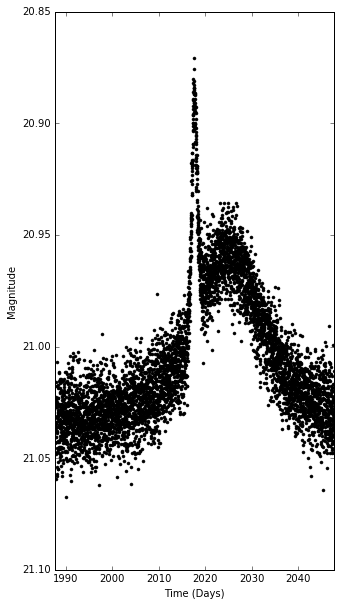

In [275]:
plt.plot(df4['t']-2458000, df4['magnitude'],'k.')
plt.gca().invert_yaxis()
plt.xlim(peaks4[0]-3*dt, peaks4[0]+3*dt)
plt.ylabel('Magnitude')
plt.xlabel('Time (Days)')
fig = plt.gcf()
fig.set_size_inches(5.0,10,0)
fig.savefig('planetary.png')

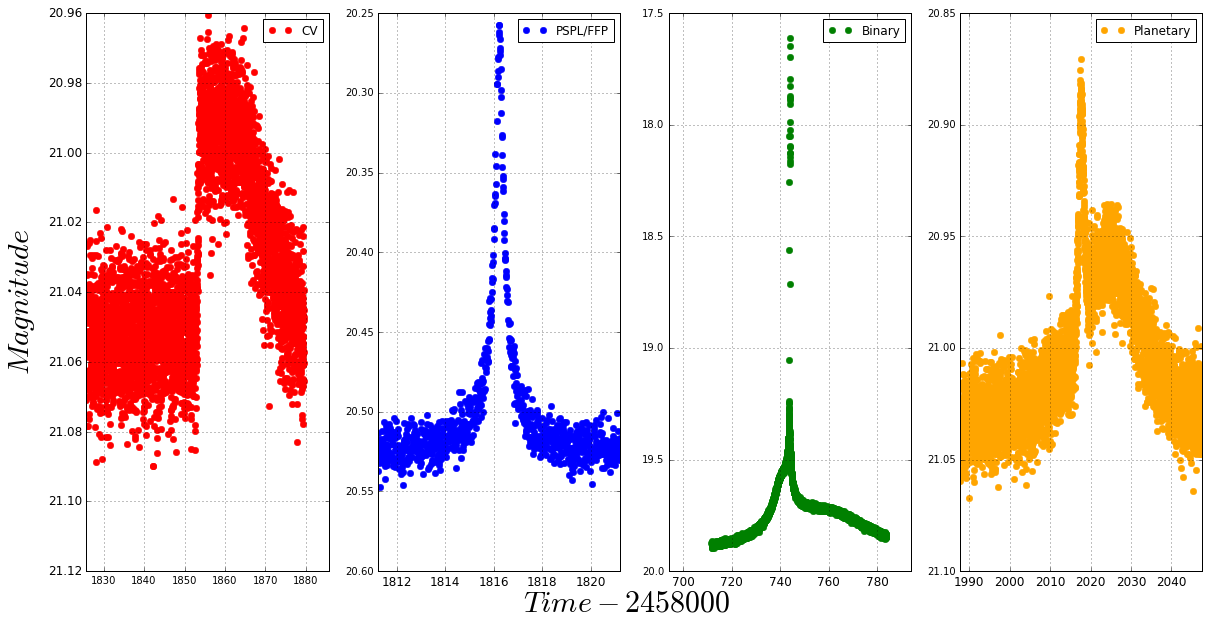

In [199]:
dt = 10

fig, axs = plt.subplots(1, 4)


axs[0].plot(df1['t']-2458000, df1['magnitude'], '.',markersize=13, label= 'CV',color='r')
axs[0].grid()
axs[0].legend()

axs[1].plot(df2['t']-2458000, df2['magnitude'], '.',markersize=13, label= 'PSPL/FFP', color='b')
axs[1].grid()
axs[1].legend()

axs[2].plot(df3['t']-2458000, df3['magnitude'], '.',markersize=13, label= 'Binary',  color = 'g')
axs[2].grid()
axs[2].legend()

axs[3].plot(df4['t']-2458000, df4['magnitude'], '.',markersize=13, label= 'Planetary', color='orange')
axs[3].grid()
axs[3].legend()


axs[1].tick_params(axis='y',which='both', bottom='off', top='off',labelbottom='off')
#axs[0, 1].tick_params(axis='y',which='both', bottom='right', top='left',labelleft='off',length=0)
axs[2].tick_params(axis='y',which='both', bottom='off', top='off',labelbottom='off')
axs[3].tick_params(axis='y',which='both', bottom='off', top='off',labelbottom='off')



axs[0].tick_params(axis='y',which='both', labelsize=12)
axs[1].tick_params(axis='x',which='both', labelsize=12)
axs[2].tick_params(axis='x',which='both', labelsize=12)
axs[3].tick_params(axis='x',which='both', labelsize=12)




# axs[0, 0].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
# axs[1, 1].tick_params(axis='y',which='both', bottom='right', top='left',labelleft='off', length=0)

axs[0].set_xlim((peaks1[0]-3*dt, peaks1[0]+3*dt))
axs[1].set_xlim((peaks2[0]-0.5*dt, peaks2[0]+0.5*dt))
axs[2].set_xlim((peaks3[0]-5*dt, peaks3[0]+5*dt))
axs[3].set_xlim((peaks4[0]-3*dt, peaks4[0]+3*dt))


axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[2].invert_yaxis()
axs[3].invert_yaxis()





plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.2, hspace=0.08) 

fig.text(0.5, 0.07, '$Time - 2458000$', ha='center',size=30)
fig.text(0.07, 0.5, '$Magnitude$', va='center', rotation='vertical',size=30)

fig = plt.gcf()
fig.set_size_inches(20.0,10.0)
fig.savefig('lc_classes_example.png')

# Creating the plot for different microlensing features 

In [4]:
temp2 = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/alldclc/'#lc/'

In [135]:
# Reading in examples of the different featurs in the lightcurve

# PSPL
# mag.dcnormffp_0_82_374.det.lc.W149
# magtrue.dcnormffp_0_82_793.det.lc.W149

f1 = '/mag.dcnormffp_0_82_374.det.lc.W149'
t1,m1,e1 = np.loadtxt(temp2+f1,unpack=True, usecols=(0,1, 2))

# m_model1 = interp1d(t1,m1, kind='cubic')(t1)
df, baseline, event, it0, dt = prepare(t1,m1,e1)
init = initial_guess_finder (df['t'], df['A'])
PSPL_params, PSPL_chisqr = PSPL_fitter_scipy (df['t'], df['A'], df['A_err'], init)
m_true1 = PSPL(PSPL_params[0],PSPL_params[1],PSPL_params[2],PSPL_params[3], df['t'])

df1 = pd.DataFrame({'t': t1, 'magnitude': m1, 'm_err': e1, 'm_true': m_true1})
peaks1 = np.array([t1[np.argmin(m1)]])-2458000

# FSPL
# magtrue.dcnormffp_0_82_1839.det.lc.W149 # rho = 0.002
# magtrue.dcnormffp_0_82_1833.det.lc.W149 # rho = 0.017
# magtrue.dcnormffp_0_82_1787.det.lc.W149 # rho = 0.04

f2 = '/magtrue.dcnormffp_0_82_1839.det.lc.W149'
t2,m2,e2, m_true2 = np.loadtxt(temp2+f2,unpack=True, usecols=(0,1, 2,3))

# m_model2 = interp1d(t2,m2, kind='cubic')(t2)


df2 = pd.DataFrame({'t': t2, 'magnitude': m2, 'm_err': e2, 'm_true': m_true2})
peaks2 = np.array([t2[np.argmin(m2)]])-2458000

# FFP

# f3 = '/mag.dcnormffp_0_82_323.det.lc.W149'
# t3,m3,e3 = np.loadtxt(temp2+f3,unpack=True, usecols=(0,1, 2))

# m_model3 = interp1d(t3,smooth(m3, 1), kind='next')(t3)

# Plotting the Cauchy distribution fitted to mag.dcnormffp_0_82_1921.det.lc.W149

t3 = np.linspace(-2,2,1000)
m3 = 18.400637-bell_curve(x, 0.0, 0.05185166130646978, 2.357262455564153, 0.3753572820864959)


df3 = pd.DataFrame({'t': t3, 'm_true': m3})
peaks3 = np.array([t3[np.argmin(m3)]])

# Binary 
# magtrue.ombin_0_16_42.det.lc.W149
# magtrue.ombin_0_31_78.det.lc.W149
# magtrue.ombin_0_32_267.det.lc.W149
# magtrue.ombin_0_83_251.det.lc.W149
# magtrue.ombin_0_71_5.det.lc.W149 not complete
# magtrue.ombin_0_57_185.det.lc.W149

f4 = '/magtrue.ombin_0_57_185.det.lc.W149'
t4,m4,e4, m_true4 = np.loadtxt(temp2+f4,unpack=True, usecols=(0,1, 2,3))

# m_model4 = interp1d(t4,m4, kind='cubic')(t4)

df4 = pd.DataFrame({'t': t4, 'magnitude': m4, 'm_err': e4, 'm_true': m_true4})
peaks4 = np.array([t4[np.argmin(m4)]])-2458000

# Planetary without caustic crossing
# magtrue.omcassan_2_109_3091.det.lc.W149
# magtrue.omcassan_3_46_27.det.lc.W149
# cassan_1_60_1555.det.lc.gz

name1 = 'cassan_1_60_1555.det.lc.gz'  
tempdata1 = 'data/WFIRST_simulated/'+str(name1)

t,f,f_err,f_true,code = np.loadtxt(tempdata1,usecols=(0,1,2,3,5),unpack=True)
df5 = pd.DataFrame({'t':t , 'f':f , 'f_err' : f_err , 'f_true': f_true, 'code':code})
df5 = df5[df5['code']==0]

fname = gzip.open(tempdata1, 'rb')
x_0 = fname.readlines()[0:7]
t01 = x_0[6].split(' ')[3]
mag5 = x_0[1].split(' ')[3]
q1 = x_0[5].split(' ')[5]
s1 = x_0[5].split(' ')[6]

peaks5 = np.array([t[np.argmax(f)]])-2458000

df5['magnitude'] = float(mag5) - np.log10(df5['f'].values)/0.4
df5['m_true'] = float(mag5) - np.log10(df5['f_true'].values)/0.4



# f5 = '/magtrue.omcassan_3_46_27.det.lc.W149'
# t5,m5,e5, m_true5 = np.loadtxt(temp2+f5,unpack=True, usecols=(0,1, 2, 3))

# # m_model5 = interp1d(t5,m5, kind='cubic')(t5)

# df5 = pd.DataFrame({'t': t5, 'magnitude': m5, 'm_err': e5, 'm_true': m_true5})
# peaks5 = np.array([t5[np.argmin(m5)]])-2458000




# Planetary with caustic crossing
# magtrue.omcassan_3_9_2947.det.lc.W149

name1 = 'cassan_29_89_251.det.lc.gz'  
tempdata1 = 'data/WFIRST_simulated/Multi_caustic_crossing/'+str(name1)

t,f,f_err,f_true,code = np.loadtxt(tempdata1,usecols=(0,1,2,3,5),unpack=True)
df6 = pd.DataFrame({'t':t , 'f':f , 'f_err' : f_err , 'f_true': f_true, 'code':code})
df6 = df6[df6['code']==0]

fname = gzip.open(tempdata1, 'rb')
x_0 = fname.readlines()[0:7]
t01 = x_0[6].split(' ')[3]
mag1 = x_0[1].split(' ')[3]
q1 = x_0[5].split(' ')[5]
s1 = x_0[5].split(' ')[6]

peaks6 = np.array([t[np.argmax(f)]])-2458000

df6['magnitude'] = float(mag1) - np.log10(df6['f'].values)/0.4
df6['m_true'] = float(mag1) - np.log10(df6['f_true'].values)/0.4



In [140]:
print min(df5['m_true']), max(df5['m_true'])

22.7790957638 22.8654


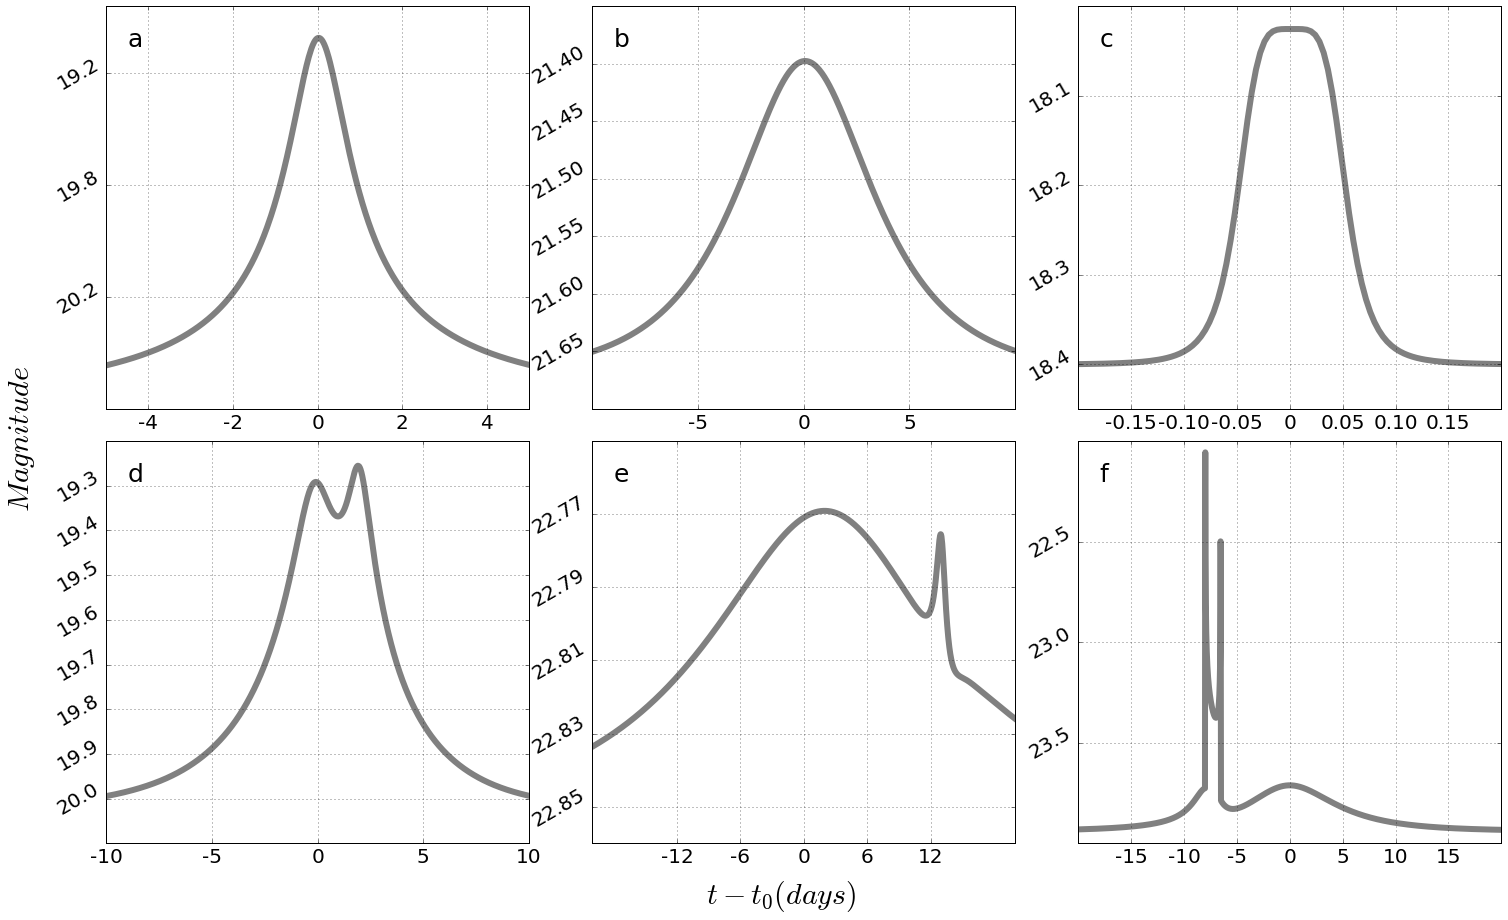

In [166]:
dt = 10

fig, axs = plt.subplots(2, 3)


axs[0,0].plot(df1['t']-2458000-peaks1[0], (df1['m_true']), '-',linewidth=6, label= 'PSPL',color='grey')
axs[0,0].grid()
axs[0,0].text(0.05,0.9,'a', size=25,transform=axs[0,0].transAxes)
axs[0,0].set_xticks([-4,-2,0,2,4])
axs[0,0].set_xticklabels(['-4','-2','0','2','4'])
axs[0,0].set_yticklabels(['','20.2','19.8','19.2'], rotation = 30)


#axs[0,0].legend()

axs[0,1].plot(df2['t']-2458000-peaks2[0], df2['m_true'], '-',linewidth=6, label= 'FSPL', color='grey')
axs[0,1].grid()
axs[0,1].text(0.05,0.9,'b', size=25,transform=axs[0,1].transAxes)
axs[0,1].set_xticks([-5,0,5])
axs[0,1].set_xticklabels(['-5','0','5'])
axs[0,1].set_yticklabels(['','21.40','21.45','21.50', '21.55', '21.60', '21.65'], rotation = 30)


#axs[0,1].legend()

axs[0,2].plot(df3['t']-peaks3[0], smooth(df3['m_true'],1), '-',linewidth=6, label= 'FFP',  color = 'grey')
axs[0,2].grid()
axs[0,2].text(0.05,0.9,'c', size=25,transform=axs[0,2].transAxes)
# axs[0,2].set_ylim((14.9, 15.4))
axs[0,2].set_xticks([-0.15,-0.10, -0.05,0,0.05,0.10,0.15])
axs[0,2].set_xticklabels(['-0.15','-0.10','-0.05','0','0.05','0.10','0.15'])
axs[0,2].set_yticklabels(['','','18.1','18.2','18.3', '18.4'], rotation = 30)


#axs[0,2].legend()

axs[1,0].plot(df4['t']-2458000-peaks4[0]+2, df4['m_true'], '-',linewidth=6, label= 'Binary', color='grey')
axs[1,0].grid()
axs[1,0].text(0.05,0.9,'d', size=25,transform=axs[1,0].transAxes)
axs[1,0].set_xticks([-10,-5,0,5,10])
axs[1,0].set_xticklabels(['-10','-5','0','5','10'])
axs[1,0].set_yticklabels(['','19.3','19.4','19.5', '19.6', '19.7', '19.8', '19.9', '20.0'], rotation = 30)


#axs[1,0].legend()

axs[1,1].plot(df5['t']-2458000-peaks5[0], df5['m_true'], '-',linewidth=6, label= 'Planetary-wo', color='grey')
axs[1,1].grid()
axs[1,1].text(0.05,0.9,'e', size=25,transform=axs[1,1].transAxes)
axs[1,1].set_xticks([-12,-6,0,6,12])
axs[1,1].set_xticklabels(['-12','-6','0','6','12'])
axs[1,1].set_ylim((22.76, 22.87))
axs[1,1].set_yticklabels(['','22.77','22.79','22.81', '22.83', '22.85'], rotation = 30)


#axs[1,1].legend()

axs[1,2].plot(df6['t']-2458000-peaks6[0]-8, df6['m_true'], '-',linewidth=6, label= 'Planetary-w',  color = 'grey')
axs[1,2].grid()
axs[1,2].text(0.05,0.9,'f', size=25,transform=axs[1,2].transAxes)
axs[1,2].set_xticks([-15,-10,-5,0,5,10,15])
axs[1,2].set_xticklabels(['-15','-10','-5','0','5','10','15'])
axs[1,2].set_yticklabels(['','22.5','23.0','23.5'], rotation = 30)



#axs[1,2].legend()


axs[0,1].tick_params(axis='y',which='both', bottom='off', top='off',labelbottom='off')
#axs[0, 1].tick_params(axis='y',which='both', bottom='right', top='left',labelleft='off',length=0)
axs[0,2].tick_params(axis='y',which='both', bottom='off', top='off',labelbottom='off')
axs[1,0].tick_params(axis='y',which='both', bottom='off', top='off',labelbottom='off')



axs[0,0].tick_params(axis='y',which='both', labelsize=20)
axs[0,1].tick_params(axis='y',which='both', labelsize=20)
axs[0,2].tick_params(axis='y',which='both', labelsize=20)
axs[1,0].tick_params(axis='y',which='both', labelsize=20)
axs[1,1].tick_params(axis='y',which='both', labelsize=20)
axs[1,2].tick_params(axis='y',which='both', labelsize=20)

axs[0,0].tick_params(axis='x',which='both', labelsize=20)
axs[0,1].tick_params(axis='x',which='both', labelsize=20)
axs[0,2].tick_params(axis='x',which='both', labelsize=20)
axs[1,0].tick_params(axis='x',which='both', labelsize=20)
axs[1,1].tick_params(axis='x',which='both', labelsize=20)
axs[1,2].tick_params(axis='x',which='both', labelsize=20)



# axs[0, 0].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
# axs[1, 1].tick_params(axis='y',which='both', bottom='right', top='left',labelleft='off', length=0)

axs[0,0].set_xlim((-0.5*dt, 0.5*dt))
axs[0,1].set_xlim((-1*dt, 1*dt))
axs[0,2].set_xlim((-0.2, 0.2))
axs[1,0].set_xlim((-1*dt, +1*dt))
axs[1,1].set_xlim((-2*dt, 2*dt))
axs[1,2].set_xlim((-2*dt, 2*dt))


# axs[0,0].invert_yaxis()
axs[0,1].invert_yaxis()
axs[0,2].invert_yaxis()
axs[1,0].invert_yaxis()
axs[1,1].invert_yaxis()
axs[1,2].invert_yaxis()





plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.15, hspace=0.08) 

fig.text(0.5, 0.07, '$t - t_0 (days)$', ha='center',size=30)
fig.text(0.07, 0.5, '$Magnitude$', va='center', rotation='vertical',size=30)

fig = plt.gcf()
fig.set_size_inches(25.0,15.0)
fig.savefig('lc_feature_example_true_models.png')

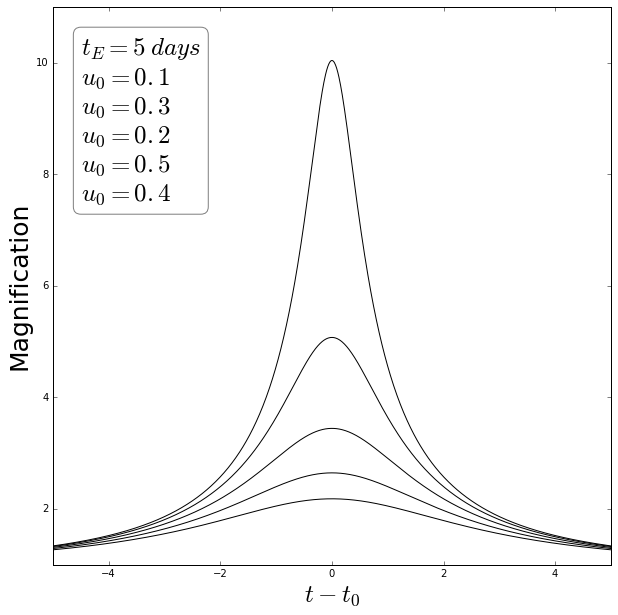

In [87]:
t = np.linspace(-10,10,2000)
t0 = 0
tE = 5.0
u0 = [0.1, 0.3, 0.2,0.5, 0.4]
for i in u0:
    #print i
    u = np.sqrt(i**2 + ((t-t0)/tE)**2)
    A = (u**2 +2)/(u*np.sqrt(4+u**2))
    plt.plot(t,A, 'k-')
    
    A_max = (i**2 +2)/(i*np.sqrt(4+i**2))
    #plt.plot(t, 1+ (A_max)*np.exp(-((t-t0)**2)/(2*(0.5**2))), 'r-')
    
plt.xlabel('$t - t_0$',size=25)
plt.ylabel('Magnification', size=25)
plt.xlim(-5,5)
#plt.title('tE = 5 days')

textstr = '\n'.join((
    r'$t_E=%.0f \:days$' % (tE, ),
    r'$u_0=%.1f$' % (u0[0], ),
    r'$u_0=%.1f$' % (u0[1], ),
    r'$u_0=%.1f$' % (u0[2], ),
    r'$u_0=%.1f$' % (u0[3], ),
    r'$u_0=%.1f$' % (u0[4], )))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax = plt.gca()
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

fig = plt.gcf()
fig.set_size_inches(10.0,10.0)
fig.savefig('PSPL_u0_example.png')

In [48]:
(t-t0)/tE

array([-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
       -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
        0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
        1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ])

# Caustic-crossing planetary lightcurves

In [107]:
name1 = 'cassan_32_46_225.det.lc.gz'  
tempdata1 = 'data/WFIRST_simulated/Multi_caustic_crossing/'+str(name1)

t,f,f_err,f_true,code = np.loadtxt(tempdata1,usecols=(0,1,2,3,5),unpack=True)
df1 = pd.DataFrame({'t':t , 'f':f , 'f_err' : f_err , 'f_true': f_true, 'code':code})
df1 = df1[df1['code']==0]

fname = gzip.open(tempdata1, 'rb')
x_0 = fname.readlines()[0:7]
t01 = x_0[6].split(' ')[3]
mag1 = x_0[1].split(' ')[3]
q1 = x_0[5].split(' ')[5]
s1 = x_0[5].split(' ')[6]

df1['m'] = float(mag1) - np.log10(df1['f'].values)/0.4
df1['m_true'] = float(mag1) - np.log10(df1['f_true'].values)/0.4

In [108]:
name2 = 'cassan_31_127_76.det.lc.gz'  
tempdata2 = 'data/WFIRST_simulated/Multi_caustic_crossing/'+str(name2)

t,f,f_err,f_true,code = np.loadtxt(tempdata2,usecols=(0,1,2,3,5),unpack=True)
df2 = pd.DataFrame({'t':t , 'f':f , 'f_err' : f_err , 'f_true': f_true, 'code':code})
df2 = df2[df2['code']==0]

fname = gzip.open(tempdata2, 'rb')
x_0 = fname.readlines()[0:7]
t02 = x_0[6].split(' ')[3]
mag2 = x_0[1].split(' ')[3]
q2 = x_0[5].split(' ')[5]
s2 = x_0[5].split(' ')[6]

df2['m'] = float(mag2) - np.log10(df2['f'].values)/0.4
df2['m_true'] = float(mag2) - np.log10(df2['f_true'].values)/0.4

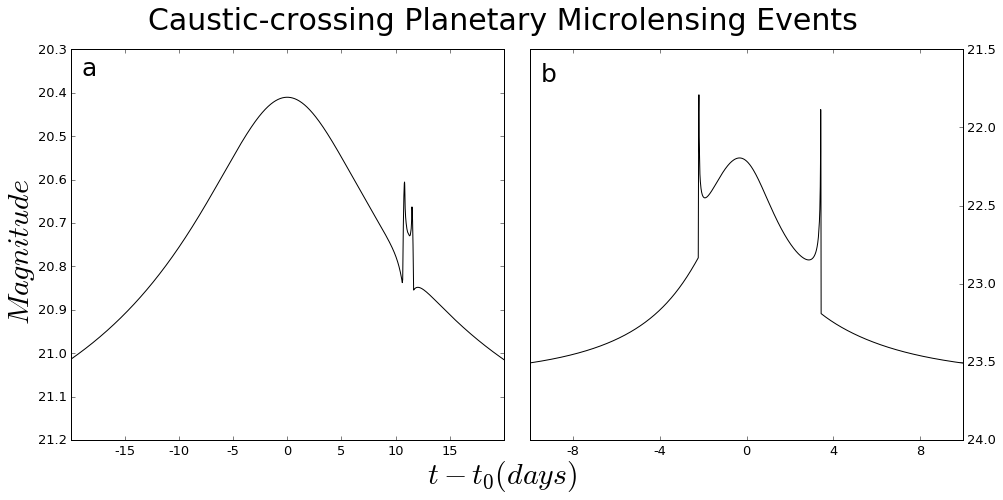

In [160]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(df1['t']-float(t01),df1['m_true'],'k-')
axs[0].set_xlim((-20,20))
axs[0].set_ylim((21.2,20.3))
axs[0].tick_params(axis='y',which='both', labelsize=13)
axs[0].tick_params(axis='x',which='both', labelsize=13)
axs[0].set_xticks([-15,-10,-5,0,5,10,15])
axs[0].set_xticklabels(['-15','-10','-5','0','5','10','15'])
axs[0].text(-19,20.36,'a', size=25)


axs[1].plot(df2['t']-float(t02),df2['m_true'],'k-')
axs[1].set_xlim((-10,10))
axs[1].yaxis.tick_right()
axs[1].tick_params(axis='y',which='both', labelsize=13)
axs[1].tick_params(axis='x',which='both', labelsize=13)
axs[1].set_xticks([-8,-4,0,4,8])
axs[1].set_xticklabels(['-8','-4','0','4','8'])
axs[1].text(-9.5,21.7,'b', size=25)



plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.06, hspace=0.08) 

fig.text(0.5, 0.94, 'Caustic-crossing Planetary Microlensing Events', ha='center',size=30)
fig.text(0.5, 0.04, '$t - t_0 (days)$', ha='center',size=30)
fig.text(0.07, 0.5, '$Magnitude$', va='center', rotation='vertical',size=30)


plt.gca().invert_yaxis()


fig = plt.gcf()
fig.set_size_inches(16.0,7.0)
fig.savefig('caustic_crossing_planetary.png')

In [161]:
print q1,q2

3.94237e-05 0.0824663


In [162]:
print s1,s2

1.10328 1.04971


In [164]:
sc1 = 1- (3* float(q1)**(1./3.))/4
sc2 = 1- (3* float(q2)**(1./3.))/4

sw1 = 1 + (3* float(q1)**(1./3.))/2
sw2 = 1 + (3* float(q2)**(1./3.))/2

In [165]:
print sc1,sw1

0.974474139557 1.05105172089


In [166]:
print sc2, sw2

0.673547424 1.652905152


# Non-caustic-crossing in different topologies

In [193]:
name1 = 'cassan_0_32_462.det.lc.gz'  
tempdata1 = home+'/Desktop/alllc1/'+str(name1)

t,f,f_err,f_true,code = np.loadtxt(tempdata1,usecols=(0,1,2,3,5),unpack=True)
df1 = pd.DataFrame({'t':t , 'f':f , 'f_err' : f_err , 'f_true': f_true, 'code':code})
df1 = df1[df1['code']==0]

fname = gzip.open(tempdata1, 'rb')
x_0 = fname.readlines()[0:7]
t01 = x_0[6].split(' ')[3]
mag1 = x_0[1].split(' ')[3]
q1 = x_0[5].split(' ')[5]
s1 = x_0[5].split(' ')[6]

df1['m'] = float(mag1) - np.log10(df1['f'].values)/0.4
df1['m_true'] = float(mag1) - np.log10(df1['f_true'].values)/0.4

In [194]:
sc1 = 1- (3* float(q1)**(1./3.))/4
sc2 = 1- (3* float(q2)**(1./3.))/4

In [195]:
print s1

0.912534


In [196]:
print sc1,sw1

0.981401744766 1.05105172089
